In [24]:
# libraries that we will need
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [25]:
#data location
train_Data = "../Dataset/day_night_images\\training"
test_Data = "../Dataset/day_night_images\\test"

In [26]:
#augmentation for train data
train_aug = ImageDataGenerator(
    rescale=1./255,               
    rotation_range=20,            
    width_shift_range=0.1,        
    height_shift_range=0.1,       
    shear_range=0.1,              
    zoom_range=0.1,              
    horizontal_flip=True,         
    fill_mode='nearest'           
)

#no need to make augmentation for test data only rescale
test_aug = ImageDataGenerator(rescale=1./255)


In [28]:
#load data to keras
img_size = (128, 128)
batch_size = 32
ready_trian = train_aug.flow_from_directory(
    train_Data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary' ,
    classes=['night', 'day'],  # Ensure correct class ordering
)
ready_test = test_aug.flow_from_directory(
    "../Dataset/day_night_images/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,  # Crucial for correct label matching
    classes=['night', 'day']  # Ensure correct class ordering
)

Found 240 images belonging to 2 classes.


Found 160 images belonging to 2 classes.


In [29]:
print(ready_trian.samples)
print(ready_trian.class_indices)
print(ready_trian.classes)

240
{'night': 0, 'day': 1}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


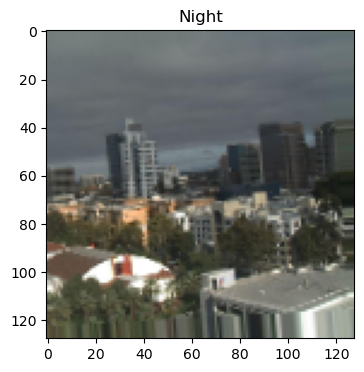

In [30]:
#show the img after add augmentation
images, labels = next(ready_trian)
plt.figure(figsize=(4, 4))
plt.imshow(images[0])
plt.title('Day' if labels[0] == 0 else 'Night')
plt.show()

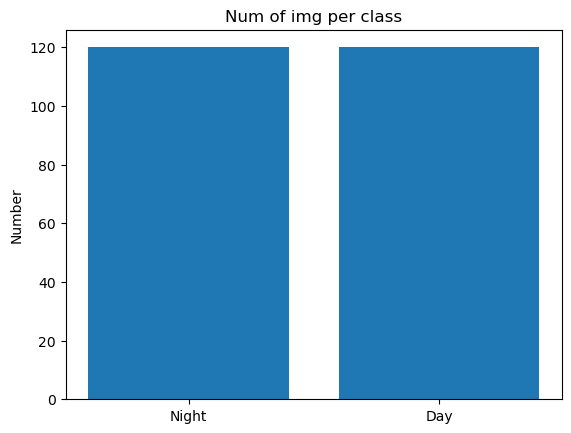

In [31]:
#Make a bar plot for the classes
night_num=np.sum(ready_trian.classes == 1)
day_num=np.sum(ready_trian.classes == 0)
plt.bar([ 'Night','Day'], [night_num,day_num])
plt.title('Num of img per class')
plt.ylabel('Number')
plt.show()

In [32]:
#bulitd the CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output
])

c:\Users\Legion\anaconda3\envs\Data_science\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,833 (940.75 KB)

 Trainable params: 240,833 (940.75 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
#compile the model 
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [35]:
# training😁
# if the model does not improving it will stop training
early_stop = EarlyStopping(
    monitor='val_loss',       
    patience=5,               
    restore_best_weights=True 
)

epochs = 20

history = model.fit(
    ready_trian,
    epochs=epochs,
    validation_data=ready_test,
    callbacks=[early_stop]  
)

c:\Users\Legion\anaconda3\envs\Data_science\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 481ms/step - accuracy: 0.5435 - loss: 0.6523 - val_accuracy: 0.9312 - val_loss: 0.2997
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 398ms/step - accuracy: 0.8902 - loss: 0.2624 - val_accuracy: 0.9563 - val_loss: 0.1181
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 405ms/step - accuracy: 0.9599 - loss: 0.0927 - val_accuracy: 0.9875 - val_loss: 0.0359
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 418ms/step - accuracy: 0.9952 - loss: 0.0372 - val_accuracy: 0.9500 - val_loss: 0.1837
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 408ms/step - accuracy: 0.9884 - loss: 0.0306 - val_accuracy: 0.8875 - val_loss: 0.4113
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 403ms/step - accuracy: 0.9567 - loss: 0.1888 - val_accuracy: 0.9937 - val_loss: 0.0322
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 424ms/step - accuracy: 0.9632 - loss: 0.1013 - val_accuracy: 0.9375 - val_loss: 0.1293
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 426ms/step - accuracy: 0.9889 - loss: 0.0522 - val_accuracy: 0.9438 - val_loss:

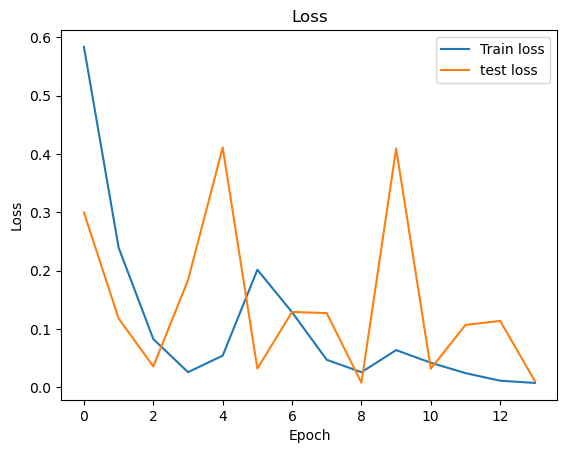

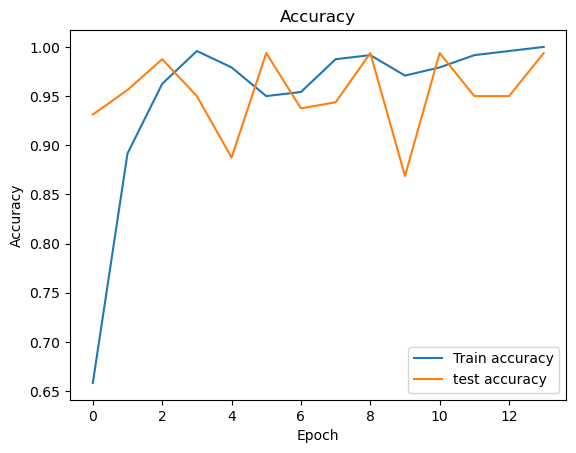

In [44]:
# plot loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()

# plot Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step


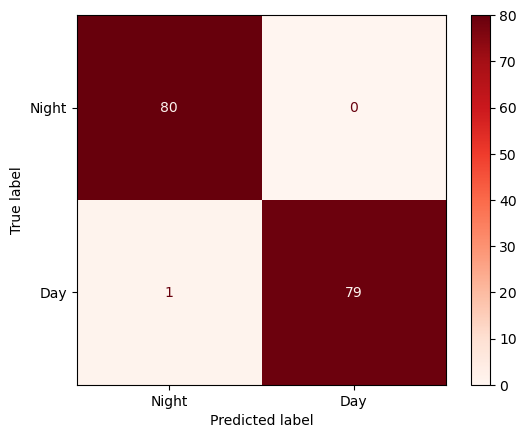

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [40]:
#bulding the confysion Materix
pred = model.predict(ready_test)
pred = np.round(pred).astype(int).flatten()
true = ready_test.classes

con_mat = confusion_matrix(true, pred)

con_mat_display = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=['Night', 'Day'])
con_mat_display.plot(cmap=plt.cm.Reds)
plt.show()
print(pred)
print(true)


In [41]:
#the final test fo the model
test_loss, test_acc = model.evaluate(ready_test)
print(f" Test Accuracy: {test_acc:.2f}")
print(f" Test loss: {test_loss:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9979 - loss: 0.0047
 Test Accuracy: 0.99
 Test loss: 0.01


In [42]:
#save the model to be used in GUI
model.save("../Model/day_night_model.keras")
print("DONE")

DONE


Conclusion:
We built a model using CNN (Convolutional Neural Network) to classify the images that it is in day or night.
We prepared the images, trained the CNN, and tested how well it works.
the finall result shows that the model works well.
then we save the model to use it in other projects.